<a href="https://colab.research.google.com/github/larialbu/curso_machine_learning_senac/blob/main/aula_13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Teste de imagens

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

#normalizacao de pixels entre 1 e 0
train_images, test_images = train_images/255.0, test_images/255.0

170498071/170498071 [==============================] - 4s 0us/step


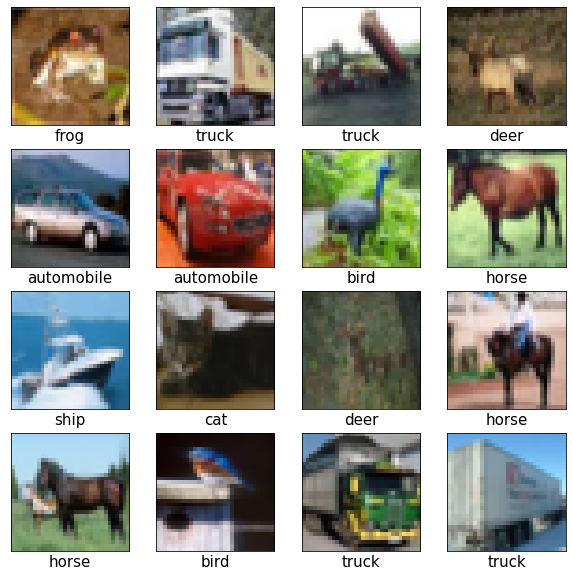

In [9]:
#vizualizacao uma amostra dos dados 
class_names=['airplane','automobile','bird','cat','deer',
             'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]], fontsize=15)
plt.show()

In [10]:
model = models.Sequential(name='CNN-CIFAR10')
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10,
                  validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1897 - accuracy: 0.5758 - val_loss: 1.1165 - val_accuracy: 0.5980
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0232 - accuracy: 0.6403 - val_loss: 0.9855 - val_accuracy: 0.6493
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9275 - accuracy: 0.6742 - val_loss: 0.9395 - val_accuracy: 0.6767
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8564 - accuracy: 0.7006 - val_loss: 0.8879 - val_accuracy: 0.6933
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8059 - accuracy: 0.7188 - val_loss: 0.8822 - val_accuracy: 0.6965
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7525 - accuracy: 0.7362 - val_loss: 0.8526 - val_accuracy: 0.7084
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7125 - accuracy: 0.7516 - val_loss: 0.8562 -

<function matplotlib.pyplot.show(*args, **kw)>

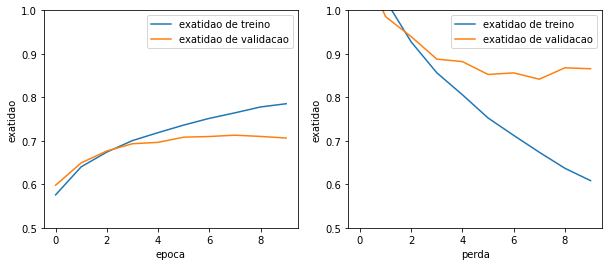

In [23]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='exatidao de treino')
plt.plot(history.history['val_accuracy'],label='exatidao de validacao')
plt.ylabel('exatidao')
plt.xlabel('epoca')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='exatidao de treino')
plt.plot(history.history['val_loss'],label='exatidao de validacao')
plt.ylabel('exatidao')
plt.xlabel('perda')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

plt.show

In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 6s 19ms/step


In [20]:
import numpy as np

<ipython-input-24-f2576300c808>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(num_rows,2*num_cols, 2*i+1)


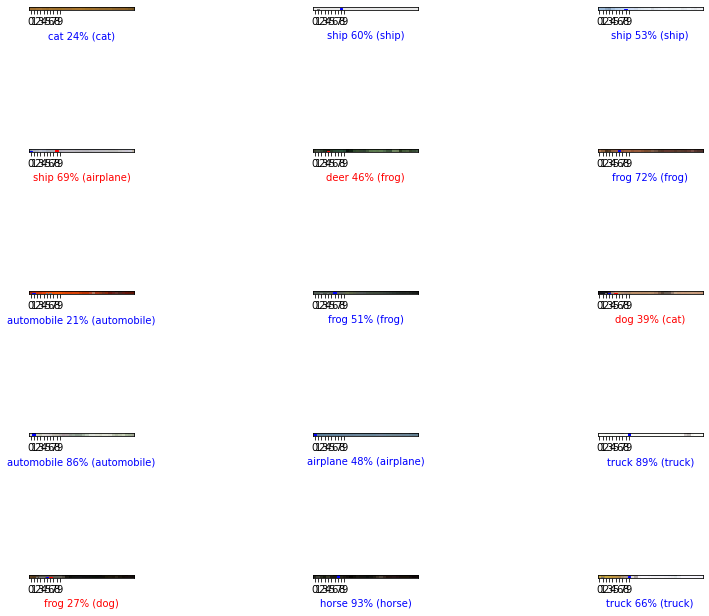

In [24]:
#previsoes coretas sao marcadas em azul erradas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols, 2*i+1)
  plot_value_array(i, predictions[i],test_labels)
plt.tight_layout()
plt.show()
